In [94]:
import numpy as np
import json

import os
import sys
sys.path.append('../../solvers/')
sys.path.append('../../src/')

from helper_functions import prettify_results, get_hyperparameter_list, read_process_results, analyze_data

import pdb
import pandas as pd

import matplotlib as mpl
from matplotlib import rcParams
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('axes', labelsize=14)
mpl.rc('axes', titlesize=14)
mpl.rc('figure', figsize=(6, 4))

In [98]:

savedir = './'
filename = 'blasius_kridge_hyper_noise.json'
filters = {'params.kernel': 'rbf'}
sortby = 'params.noise_amp'
pickcols = ['x_list', 'loss_list', 'params.noise_amp']
dataframe = read_process_results(filename=filename, savedir=savedir, filters=filters, sortby=sortby, pickcols=pickcols)
dataframe
# dataframe = dataframe.drop(4)

,x_list,loss_list,params.noise_amp
4,"[[1.1155238584235556, -0.09890357535366752, 1....","[0.0032477384647060033, 0.0013339406067250418,...",0.000000
9,"[[0.7561657768394058, 0.4271046383712968, 1.18...","[0.0035498696890887372, None, 0.00502742811647...",0.000001
6,"[[-0.16813236320566738, 0.3495636751634687, 0....","[0.0010745988337489219, 0.0010754215338051683,...",0.000010
12,"[[0.8168587182810426, 0.2731733894794792, 1.09...","[0.0032701482192682954, 0.0029350854175496837,...",0.000050
7,"[-1, [-0.16782377029707604, 0.3461579213409524...","[None, 0.0011010967090396959, 0.00109509971222...",0.000100
15,"[[1.0308964903247542, -0.03896231602016097, 0....","[0.003053769655255602, 0.0029116483363869666, ...",0.000500
3,"[[-0.1708205619400367, 0.35309770947736974, 0....","[0.0010286699755609708, None, 0.00102874999781...",0.001000
18,"[[4.095989682797464, -5.234766744201445, -1.13...","[0.011621455154628587, 0.0034409443445688193, ...",0.005000
5,"[[0.3727762964553565, -0.7633854041263322, -0....","[0.003522989076329059, 0.0018576307438620565, ...",0.010000
11,"[[0.2581570495961646, -0.5407676766438057, -0....","[0.014478349023304539, 0.01639790489462253, 0....",0.050000


In [99]:
dataframe = analyze_data(dataframe)
dataframe = dataframe.drop([17, 4])
dataframe[['params.noise_amp', 'x_norm', 'error_sol', 'error_opt', 'error_mean', 'error_std', 'num_net', 'loss_opt']]


,params.noise_amp,x_norm,error_sol,error_opt,error_mean,error_std,num_net,loss_opt
9,0.000001,"[[1.77044618321856, 1.0, 2.77044618321856, -2....",0.027328,0.029434,0.679145,1.454957,6,0.001065
6,0.000010,"[[-0.4809777878866921, 1.0, 0.5190222121133092...",0.032947,0.033226,0.033087,0.000139,2,0.001073
12,0.000050,"[[2.9902572861783265, 1.0, 3.9902572861783265,...",0.008732,0.027335,1.227378,2.408974,5,0.001010
7,0.000100,"[[-0.48481851764927825, 1.0, 0.515181482350721...",0.026144,0.027274,0.026685,0.000464,6,0.001080
15,0.000500,"[[-26.458809322097768, 1.0, -25.45880932209776...",0.029487,0.036365,9.019893,17.971042,5,0.001963
3,0.001000,"[[-0.48377703212199596, 1.0, 0.516222967878004...",0.026701,0.026701,0.027891,0.000766,6,0.001020
18,0.005000,"[[-0.7824588721808082, 1.0, 0.2175411278191917...",0.036005,0.036669,1.093252,1.895670,5,0.001369
5,0.010000,"[[-0.4883199160481538, 1.0, 0.5116800839518462...",0.020230,0.033005,0.029287,0.005246,4,0.001849
11,0.050000,"[[-0.4773899416444008, 1.0, 0.5226100583555993...",0.037948,9.634038,6.610052,9.570967,6,0.003033
2,0.100000,"[[-0.5992660777597396, 1.0, 0.4007339222402604...",0.171934,5.403382,3.595780,4.537452,6,0.003019


/Users/josephbakarji/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


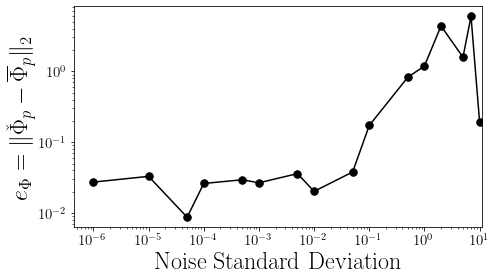

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.noise_amp'][:-1], dataframe['error_sol'][:-1], 'k.-', markersize=15)
ax.set_xlim([0, 11])
ax.set_xlabel('Noise Standard Deviation', fontsize=24)
ax.set_ylabel(r'$e_\Phi = \| \check{ \Phi}_p - \overline{ \Phi}_p\|_2$', fontsize=24)
plt.tight_layout()
plt.show()

fig.savefig('error_vs_noise.pdf')



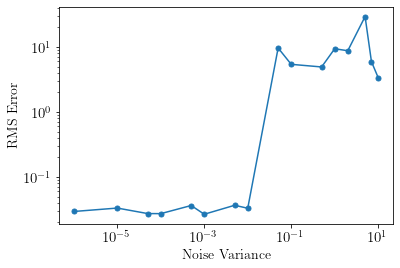

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.noise_amp'][:-1], dataframe['error_opt'][:-1], '.-', markersize=10)
ax.set_xlabel('Noise Variance')
ax.set_ylabel('RMS Error')
# ax.set_xlim([1e-5, 11])
plt.show()